## Import Libraries

In [7]:
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from hazm import word_tokenize, stopwords_list
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import gensim
# !python -m spacy download en_core_web_md
# !pip install hazm

# Preprocessing with Python

At the beginning, I provided a simple example of basic text preprocessing in Python for natural language processing (NLP):

Convert Text to Lowercase:
The input text is converted to lowercase to ensure uniformity and avoid case sensitivity during processing.

Tokenization (Splitting Text into Words):
The lowercase text is split into a list of individual words (tokens) for easier manipulation.

Stop Words Removal:
Common and less meaningful words such as “is,” “a,” “the,” and others are removed from the list to focus on more important words and improve further text analysis.

## Read text







In [2]:
text = 'Hello this is me, again and this is our king. the king is a man. Apple is Green'
text

'Hello this is me, again and this is our king. the king is a man. Apple is Green'

## Split text into words and lower them


In [3]:
words = text.lower()
words = words.split()
print('{}, {}'.format(words, type(words)))

['hello', 'this', 'is', 'me,', 'again', 'and', 'this', 'is', 'our', 'king.', 'the', 'king', 'is', 'a', 'man.', 'apple', 'is', 'green'], <class 'list'>


##Delete stop words
stop words don't have valuable information

In [4]:
stop_words = ['is', 'a', 'the', 'that','this']
for word in stop_words:
  if word in words:
        words.remove(word)
words

['hello',
 'me,',
 'again',
 'and',
 'this',
 'is',
 'our',
 'king.',
 'king',
 'is',
 'man.',
 'apple',
 'is',
 'green']

# Preprocessing with nltk library

NLTK (Natural Language Toolkit) is a popular Python library used for working with human language data (text). It provides easy-to-use tools for tasks such as tokenization, stop word removal, stemming, tagging, parsing, and more, making it a great choice for learning and implementing NLP.
This library is simple and fast, but doesn't support persian texts





Remove Punctuation:
Using the re.sub() function, all characters except word characters (\w) and whitespace (\s) are removed from the text. This cleans the text by eliminating punctuation marks and special symbols.

Convert to Lowercase:
After cleaning, the text is converted to lowercase to standardize it for further processing.



In [5]:
cleaned_data = re.sub(r'[^\w\s]', '', text)
cleaned_data
lowercase_text = cleaned_data.lower()
print(lowercase_text)

hello this is me again and this is our king the king is a man apple is green


##Tokenize sentence
We use a pre-train model called 'punkt_tab'. Each sentence turn into multiple words (Word Tokenization)
The word_tokenize function uses pre-trained models (downloaded with nltk.download('punkt')) to accurately identify word boundaries, including handling punctuation and contractions.

In [6]:
nltk.download('punkt_tab')
t = word_tokenize(text)
t

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['Hello',
 'this',
 'is',
 'me',
 ',',
 'again',
 'and',
 'this',
 'is',
 'our',
 'king',
 '.',
 'the',
 'king',
 'is',
 'a',
 'man',
 '.',
 'Apple',
 'is',
 'Green']

## Remove Stop Words and punctuations




In [7]:
nltk.download('stopwords')
# List of English stopwords
stop_words = set(stopwords.words('english'))
print(f'stop words in English are {stop_words}')
# Remove stopwords
filtered_tokens = [word for word in t if word.isalpha() and word.lower() not in stop_words]

print(f'final tokens are: {filtered_tokens}')


stop words in English are {'most', "he's", 'if', 'which', 'between', "we'll", "mightn't", 'by', 'an', "they're", "i'd", 'here', 'below', 'while', 'your', 'hasn', "it's", 'its', 'and', 'ourselves', 'each', 'do', "i'll", "you'll", 'weren', 'from', 'itself', 'in', 'because', "i'm", 'were', 'ma', 'all', 'll', 'yourself', "doesn't", "that'll", 'wasn', 'then', 'both', 'him', 'very', "won't", 'hadn', 'off', 'any', 'some', 'through', 'am', 'nor', 'doing', 'myself', 'than', "wasn't", 'me', 'few', 'his', 'own', 'with', 'further', 'after', "we're", 'have', "needn't", 'was', 'as', 'aren', 'mustn', 'or', 'shan', "she's", "hadn't", 'just', 'what', 'now', "you're", 'such', 'before', 'on', "didn't", 'under', 'yourselves', 'shouldn', 'didn', 'i', "they'd", 'not', 'this', 'against', 'o', "mustn't", 'down', 'my', 'their', 'ain', 'up', 'd', "they'll", "shan't", 'about', 'over', 'but', 'there', 're', 'you', "he'll", 'will', 'until', "it'll", 'during', 'couldn', "shouldn't", 've', 'isn', 'to', 'our', 'm', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#Preprocessing wit hazm library
hazm lobrary is just like nltk but hazm support persian text.

In [8]:
text2 = "این یک متن نمونه است و باید پردازش شود."
tokens = word_tokenize(text2)
stop_words = set(stopwords_list())  # {'و', 'این', 'یک', ...}
print(f'stop words in persian are {stop_words}')
filtered_tokens = [word for word in tokens if word not in stop_words]
print(f'finall token is  {filtered_tokens}')

stop words in persian are {'بی', 'رفت', 'سوی', 'دانست', 'بنابراین', 'نشست', 'گذاری', 'پی', 'دادند', 'خودش', 'درون', 'شده', 'بهترین', 'داشته_باشد', 'چیز', 'شده_اند', 'جمعی', 'زیادی', 'کردم', 'بزرگ', 'ساز', 'مانند', 'جریان', 'بوده', 'می\u200cیابد', 'کرده_بود', 'همین', 'یکدیگر', 'باز', 'می\u200cکرد', 'داشتند', 'شده_است', 'محسوب', 'می\u200cکند', 'سی', 'نوعی', 'طی', 'چند', 'می\u200cگوید', 'کوچک', 'باره', 'خواهد_شد', 'دارند', 'تبدیل', 'هیچ', 'بیشتر', 'اند', 'می\u200cتوان', 'تهیه', 'پیدا', 'داشته_است', 'چهار', 'دوم', 'ترتیب', 'حداقل', 'سایر', 'گردد', 'لحاظ', 'بین', 'زاده', 'بوده_است', 'لازم', 'بعضی', 'شدند', 'کنید', 'همچنین', 'همیشه', 'آنان', 'کرد', 'میان', 'بیشتری', 'ساله', 'بر', 'شان', 'کامل', 'کنیم', 'اما', 'متاسفانه', 'دو', 'گفته', 'این', 'دارد', 'اش', 'می\u200cکنیم', 'وی', 'باشد', 'آن', 'حال', 'کننده', 'پس', 'اکنون', 'برابر', 'همواره', 'چه', 'نیست', 'همچنان', 'خویش', 'اول', 'داده_است', 'آنجا', 'هنوز', 'ما', 'فوق', 'پر', 'رو', 'دور', 'چیزی', 'کسی', 'سپس', 'داده', 'علاوه', 'تعداد', 'بخشی',

# Spacy library
spaCy is a robust open-source library for Python, ideal for natural language processing (NLP) tasks.
There is a pipeline for Spacy library:

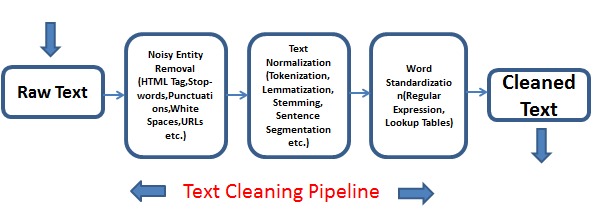

In [13]:
nlp = spacy.load("en_core_web_sm")
text = "Hello this is me, again and this is our king. the king is a man. Apple is Green! Ali doesn't like maryam"
doc = nlp(text)
for token in doc:
  display(token.text)

'Hello'

'this'

'is'

'me'

','

'again'

'and'

'this'

'is'

'our'

'king'

'.'

'the'

'king'

'is'

'a'

'man'

'.'

'Apple'

'is'

'Green'

'!'

'Ali'

'does'

"n't"

'like'

'maryam'

We can load a small English language model that includes vocabulary, syntax, and entities.(spacy.load("en_core_web_sm") )

The text is processed by the model (nlp(text)), which analyzes and tokenizes it.

The for loop iterates over each token (word or punctuation) in the processed text and prints its text form.

SpaCy’s tokenizer is powerful and context-aware, making it great for many NLP tasks like tokenization, part-of-speech tagging, and named entity recognition.



In [17]:
for token in doc:
    display(f"Token: {token.text}, POS: {token.pos_}, Tag: {token.tag_}, Dep: {token.dep_}")

'Token: Hello, POS: INTJ, Tag: UH, Dep: intj'

'Token: this, POS: PRON, Tag: DT, Dep: nsubj'

'Token: is, POS: AUX, Tag: VBZ, Dep: ROOT'

'Token: me, POS: PRON, Tag: PRP, Dep: attr'

'Token: ,, POS: PUNCT, Tag: ,, Dep: punct'

'Token: again, POS: ADV, Tag: RB, Dep: advmod'

'Token: and, POS: CCONJ, Tag: CC, Dep: cc'

'Token: this, POS: PRON, Tag: DT, Dep: nsubj'

'Token: is, POS: AUX, Tag: VBZ, Dep: conj'

'Token: our, POS: PRON, Tag: PRP$, Dep: poss'

'Token: king, POS: NOUN, Tag: NN, Dep: attr'

'Token: ., POS: PUNCT, Tag: ., Dep: punct'

'Token: the, POS: DET, Tag: DT, Dep: det'

'Token: king, POS: NOUN, Tag: NN, Dep: nsubj'

'Token: is, POS: AUX, Tag: VBZ, Dep: ROOT'

'Token: a, POS: DET, Tag: DT, Dep: det'

'Token: man, POS: NOUN, Tag: NN, Dep: attr'

'Token: ., POS: PUNCT, Tag: ., Dep: punct'

'Token: Apple, POS: PROPN, Tag: NNP, Dep: nsubj'

'Token: is, POS: AUX, Tag: VBZ, Dep: ROOT'

'Token: Green, POS: PROPN, Tag: NNP, Dep: attr'

'Token: !, POS: PUNCT, Tag: ., Dep: punct'

'Token: Ali, POS: PROPN, Tag: NNP, Dep: nsubj'

'Token: does, POS: AUX, Tag: VBZ, Dep: aux'

"Token: n't, POS: PART, Tag: RB, Dep: neg"

'Token: like, POS: VERB, Tag: VB, Dep: ROOT'

'Token: maryam, POS: NOUN, Tag: NN, Dep: dobj'

In [16]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 65 70 ORG
Ali 81 84 PERSON


We should clean our tokens by these steps:

Filtering out stop words (common words like "is", "the", etc. that usually don’t add meaning) using token.is_stop.

Filtering out punctuation marks using token.is_punct.

Appending only meaningful tokens (words) to the cleaned_tokens list.



In [19]:
cleaned_tokens = []
for token in doc:
    if not token.is_stop and not token.is_punct:
        cleaned_tokens.append(token.text)

display("Cleaned tokens:", cleaned_tokens)

'Cleaned tokens:'

['Hello', 'king', 'king', 'man', 'Apple', 'Green', 'Ali', 'like', 'maryam']

# Embedding with gensim library
### Using Gensim for Word Embeddings
Gensim is a powerful and popular Python library designed for topic modeling and natural language processing. It provides an efficient and easy-to-use implementation of Word2Vec, allowing you to train your own word embeddings on custom text data.

Key advantages of using Gensim for Word2Vec include:

Efficient Training: Supports large datasets with optimized algorithms and incremental training.

Simple API: Easy to train, save, and load models.

Flexibility: Allows tuning of parameters like vector size, window size, and training algorithm (CBOW or Skip-gram).

Pre-trained Models: You can also use pre-trained embeddings for many languages.

With Gensim, you can quickly convert words into meaningful vector representations that capture semantic relationships, which are useful for many downstream NLP tasks.



# Install gensim

In [21]:
# !pip install --only-binary=gensim gensim
# !pip install --upgrade pip setuptools wheel
!pip install gensim

Word embeddings are numerical vector representations of words that capture their meanings, semantic relationships, and syntactic properties in a continuous vector space. They allow machines to understand words in context, enabling many natural language processing (NLP) tasks such as sentiment analysis, machine translation, and text classification.

One of the most important and widely used methods for creating word embeddings is Word2Vec.

### Word2Vec
Word2Vec is a popular technique that converts words into dense vectors of arbitrary dimensions. It learns word representations by predicting words based on their context in a large corpus of text.

Word2Vec uses two main architectures for training word embeddings:

1. CBOW (Continuous Bag of Words)
Key Question:
Given the surrounding words (context), what is the most likely target word at the center?

Example:
Sentence: "The cat sits on the mat"
Input (context): ["The", "cat", "on", "the", "mat"]
Output (target): "sits"

Characteristics:

Faster to train, making it suitable for large datasets.

Performs better on frequent words.

2. Skip-gram
Key Question:
Given a target word, what words are likely to appear around it (context)?

Example:
Sentence: "The cat sits on the mat"
Input (target): "sits"
Output (context): ["The", "cat", "on", "the", "mat"]

Characteristics:

Provides higher accuracy for rare words or complex phrases.

Requires more training data and computational resources.



In [23]:
w = [['hi', 'my', 'name', 'is', 'zahra'],['king', 'has', 'power'],['queen', 'is', 'loyal'], words]
model = gensim.models.Word2Vec(w, vector_size=3, window=5, min_count=1, workers=1, sg=0) # using CBOW Architecture for trainnig by sg=0
# model = gensim.models.Word2Vec(w, vector_size=3, window=5, min_count=1, workers=1, sg=1) # using skipGram Architecture for training by sg=1
vector = model.wv['hello']
vector

array([-0.24397223, -0.07779229, -0.06459137], dtype=float32)

In [25]:
#Summarize the loaded model
print(model)
# Summarize vocabulary
words = list(model.wv.index_to_key)
print(words)
# Access vector for one word
print(model.wv['hello'])  # Correct way to get vector

Word2Vec<vocab=20, vector_size=3, alpha=0.025>
['is', 'king', 'green', 'apple', 'my', 'name', 'zahra', 'has', 'power', 'queen', 'loyal', 'hello', 'me,', 'again', 'and', 'this', 'our', 'king.', 'man.', 'hi']
[-0.24397223 -0.07779229 -0.06459137]


In [26]:
#Compute similarity
print("Similarity between hi and hello:",model.wv.similarity('hello', 'hi'))
print("Similarity between king and hi:",model.wv.similarity('king', 'hi'))
print("Similarity between king and queen:",model.wv.similarity('king', 'queen'))

Similarity between hi and hello: 0.4137667
Similarity between king and hi: -0.53039074
Similarity between king and queen: 0.988718


Word Embedding with Classic Algorithm
TF-IDF:

In [28]:
corpus = ['I love nlp', 'nlp is fun', 'I enjoy machine learning', 'learning is great']
vectorize =TfidfVectorizer(stop_words='english')
# vectorize =CountVectorizer(stop_words='english')
x = vectorize.fit_transform(corpus)
print(x.toarray())
print(vectorize.get_feature_names_out())

[[0.         0.         0.         0.         0.78528828 0.
  0.6191303 ]
 [0.         0.78528828 0.         0.         0.         0.
  0.6191303 ]
 [0.61761437 0.         0.         0.48693426 0.         0.61761437
  0.        ]
 [0.         0.         0.78528828 0.6191303  0.         0.
  0.        ]]
['enjoy' 'fun' 'great' 'learning' 'love' 'machine' 'nlp']


The model is created by TfidfVectorizer, which is responsible for calculating TF-IDF (Term Frequency - Inverse Document Frequency). This model assigns a numerical weight to each word in a text, indicating the importance of that word within a given dataset of texts.

TF (Term Frequency): The frequency of a word in a specific document.

IDF (Inverse Document Frequency): The inverse of the frequency of documents that contain the word, indicating how rare or common a word is across the entire text corpus.

## Word Embedding with spaCy

In [30]:
nlp = spacy.load("en_core_web_sm")
doc = nlp("I love coffee")
print("vectore of word  'I':", doc[2].vector)  # the vector
doc_vector = doc.vector
print(" whole vector :", doc_vector)

vectore of word  'I': [ 0.2798245  -0.4124304   0.75736374  0.03007131  0.02294396  0.3065338
  1.7175772   0.3070166   0.4685409  -0.18986315  0.3022109  -0.3004337
 -0.42582202  0.36418682  0.41736928  0.6758911  -0.71772003 -0.5916075
 -0.28403097 -0.01277104  0.08186535  1.42117    -0.7210002  -0.21898009
 -0.12691122  0.15890782  0.03687936 -0.43232912 -0.37768227  0.14926013
 -0.9221091   0.6519158   0.25451374  0.32057908 -0.6961285  -0.30604187
 -0.03522727  0.1458869   0.25056964  0.42449307 -0.7809199   1.1174874
  0.11471996  0.43448016 -0.03251775 -0.01708399 -1.3525333  -0.1380522
 -0.7680636  -0.15767384  0.926775   -0.33059442  0.26376188 -0.90464526
  0.45594794 -0.96185887  1.0394007   0.59627026  0.15457833 -0.33140746
 -0.42168117 -0.14860088 -0.1931392  -0.5490756  -0.11835518  0.15390676
  1.1021172   0.01342243 -0.33302575 -0.06850247 -0.61401004  0.34231162
  0.12139341 -0.44367623 -0.7450189  -0.2920655   0.34194952 -0.7470629
  0.0877625  -0.98352003 -0.5173587

Similarity between 2 senences:

In [33]:
nlp = spacy.load("en_core_web_md")  # make sure to use larger package!
doc1 = nlp("I like salty fries and hamburgers.")
doc2 = nlp("Fast food tastes very good.")

# Similarity of two documents
print(doc1, "<->", doc2, doc1.similarity(doc2))
# Similarity of tokens and spans
french_fries = doc1[2:4]
burgers = doc1[5]
print(french_fries, "<->", burgers, french_fries.similarity(burgers))


I like salty fries and hamburgers. <-> Fast food tastes very good. 0.8015960629076846
salty fries <-> hamburgers 0.5733411312103271


The pipeline() function is a high-level API designed to simplify using transformer models for a variety of natural language processing tasks. When you call pipeline() with a specific task name, it automatically:

Loads a suitable pre-trained model and its corresponding tokenizer optimized for that task.

Handles all the necessary preprocessing, tokenization, and postprocessing steps internally.

Provides a simple interface to perform inference, allowing you to input raw text and receive meaningful outputs like classifications, answers, or summaries.

This abstraction lets users quickly leverage powerful, state-of-the-art transformer models (like BERT, RoBERTa, GPT, etc.) without needing to understand the complex underlying mechanics.

In [11]:
# from transformers import pipeline
# classifier = pipeline("sentiment-analysis")
# classifier("We are very happy to show you the Transformers library.");


The pipeline() automatically loads a default model and tokenizer capable of inference for your task.

In [9]:
# generator = pipeline(task="text-generation")
# generator(
#     "Three Rings for the Elven-kings under the sky, Seven for the Dwarf-lords in their halls of stone",
#     num_return_sequences=2,
# )

In [8]:
# summarizer = pipeline("summarization")

# ARTICLE = """ New York (CNN)When Liana Barrientos was 23 years old, she got married in Westchester County, New York.
# A year later, she got married again in Westchester County, but to a different man and without divorcing her first husband.
# Only 18 days after that marriage, she got hitched yet again. Then, Barrientos declared "I do" five more times, sometimes only within two weeks of each other.
# In 2010, she married once more, this time in the Bronx. In an application for a marriage license, she stated it was her "first and only" marriage.
# Barrientos, now 39, is facing two criminal counts of "offering a false instrument for filing in the first degree," referring to her false statements on the
# 2010 marriage license application, according to court documents.
# Prosecutors said the marriages were part of an immigration scam.
# On Friday, she pleaded not guilty at State Supreme Court in the Bronx, according to her attorney, Christopher Wright, who declined to comment further.
# After leaving court, Barrientos was arrested and charged with theft of service and criminal trespass for allegedly sneaking into the New York subway through an emergency exit, said Detective
# Annette Markowski, a police spokeswoman. In total, Barrientos has been married 10 times, with nine of her marriages occurring between 1999 and 2002.
# All occurred either in Westchester County, Long Island, New Jersey or the Bronx. She is believed to still be married to four men, and at one time, she was married to eight men at once, prosecutors say.
# Prosecutors said the immigration scam involved some of her husbands, who filed for permanent residence status shortly after the marriages.
# Any divorces happened only after such filings were approved. It was unclear whether any of the men will be prosecuted.
# The case was referred to the Bronx District Attorney\'s Office by Immigration and Customs Enforcement and the Department of Homeland Security\'s
# Investigation Division. Seven of the men are from so-called "red-flagged" countries, including Egypt, Turkey, Georgia, Pakistan and Mali.
# Her eighth husband, Rashid Rajput, was deported in 2006 to his native Pakistan after an investigation by the Joint Terrorism Task Force.
# If convicted, Barrientos faces up to four years in prison.  Her next court appearance is scheduled for May 18.
# """

In [5]:
# display(summarizer(ARTICLE, max_length=130, min_length=30, do_sample=False))

[{'summary_text': ' Liana Barrientos, 39, is charged with two counts of "offering a false instrument for filing in the first degree" In total, she has been married 10 times, with nine of her marriages occurring between 1999 and 2002 . At one time, she was married to eight men at once, prosecutors say .'}]